In [1]:
import ILRS_Uncertainty as unc
import truth_request as tr
import orekit
import random
from orekit.pyhelpers import  setup_orekit_curdir

In [43]:
from imp import reload

In [249]:
import numpy as np

In [2]:
# Initialize orekit
orekit_vm = orekit.initVM()
setup_orekit_curdir("/Users/gkeramidas/Projects/learning/leolabs-config-data-dynamic/")

In [3]:
end_epoch = [2021,7,30] # epoch from which we will go back certain number of days
length_of_search = 30
prov_type = "hts"

end_year = end_epoch[0]
end_month = end_epoch[1]
end_day = end_epoch[2]

In [4]:
base_year, base_month, base_day = unc.base_date([end_year, end_month, end_day], length_of_search) # base epoch from where our comparisons begin

In [5]:
leolabs_id = 'L4884'

In [124]:
with open("/Users/gkeramidas/Projects/learning/ILRS_single_provider_uncertainties.txt","a") as f:
    f.write(leolabs_id + "\n")
    f.write(str(base_month)+"/"+str(base_day)+"/"+str(base_year)+"\n")

In [7]:
print("leo_id:", leolabs_id)
print(base_year,base_month,base_day)

leo_id: L4884
2021 6 30


In [8]:
# sets up directory and downloads relevant data files
directory = tr.set_up_truth_directory_for_target(leolabs_id)+"/"
tr.dwld_data_for_target(leolabs_id, end_epoch, length_of_search)

info Syncing ILRS truth data from S3 (102 files downloaded)


In [9]:
# Initializes tephem objects from directory files
ephemerides = unc.truth_ephems_from_directory(directory)

In [10]:
# Debugging printing statement
for ephem in ephemerides:
    print(ephem.name)

lares_cpf_210627_6781.dgf
lares_cpf_210729_7101.hts
lares_cpf_210704_6851.dgf
lares_cpf_210705_6861.sgf
lares_cpf_210628_6791.sgf
lares_cpf_210703_6841.hts
lares_cpf_210629_6801.sgf
lares_cpf_210722_7031.sgf
lares_cpf_210626_6771.sgf
lares_cpf_210715_6961.sgf
lares_cpf_210714_6951.dgf
lares_cpf_210713_6941.hts
lares_cpf_210727_7081.hts
lares_cpf_210630_6811.dgf
lares_cpf_210725_7061.dgf
lares_cpf_210724_7051.sgf
lares_cpf_210718_6991.hts
lares_cpf_210712_6931.dgf
lares_cpf_210706_6871.hts
lares_cpf_210708_6891.hts
lares_cpf_210717_7011.dgf
lares_cpf_210702_6831.dgf
lares_cpf_210716_6971.hts
lares_cpf_210719_7001.sgf
lares_cpf_210721_7021.hts
lares_cpf_210728_7091.sgf
lares_cpf_210714_6951.hts
lares_cpf_210701_6821.sgf
lares_cpf_210713_6941.dgf
lares_cpf_210727_7081.dgf
lares_cpf_210627_6781.hts
lares_cpf_210729_7101.dgf
lares_cpf_210704_6851.hts
lares_cpf_210711_6921.sgf
lares_cpf_210713_6942.dgf
lares_cpf_210710_6911.dgf
lares_cpf_210726_7071.sgf
lares_cpf_210708_6891.dgf
lares_cpf_21

In [78]:
reload(unc)

<module 'ILRS_Uncertainty' from '/Users/gkeramidas/Projects/learning/ILRS_Uncertainty.py'>

In [55]:
prov_list = ["hts","sgf"]
preferred_prov = "hts"

In [126]:
# Main function that does the comparison
unc_X1day, unc_X2days, unc_X3days, unc_Y1day, unc_Y2days, unc_Y3days, unc_Z1day, unc_Z2days, unc_Z3days = unc.compare_single_prov_ephems(ephemerides, base_year, base_month, base_day, length_of_search, prov_list, preferred_prov)

base: lares_cpf_210630_6811.hts
one: lares_cpf_210629_6801.hts
two: lares_cpf_210628_6791.hts
three: lares_cpf_210627_6781.hts
base: lares_cpf_210701_6821.hts
one: lares_cpf_210630_6811.hts
two: lares_cpf_210629_6801.hts
three: lares_cpf_210628_6791.hts
base: lares_cpf_210702_6831.hts
one: lares_cpf_210701_6821.hts
two: lares_cpf_210630_6811.hts
three: lares_cpf_210629_6801.hts
base: lares_cpf_210703_6841.hts
one: lares_cpf_210702_6831.hts
two: lares_cpf_210701_6821.hts
three: lares_cpf_210630_6811.hts
base: lares_cpf_210704_6851.hts
one: lares_cpf_210703_6841.hts
two: lares_cpf_210702_6831.hts
three: lares_cpf_210701_6821.hts
base: lares_cpf_210705_6861.sgf
one: lares_cpf_210704_6851.hts
two: lares_cpf_210703_6841.hts
three: lares_cpf_210702_6831.hts
base: lares_cpf_210706_6871.hts
one: lares_cpf_210705_6861.sgf
two: lares_cpf_210704_6851.hts
three: lares_cpf_210703_6841.hts
base: lares_cpf_210707_6881.hts
one: lares_cpf_210706_6871.hts
two: lares_cpf_210705_6861.sgf
three: lares_cpf_

In [146]:
print(unc_Z3days)

[27.898000478744507, 24.957098833518103, 28.03635080298409, 5.1666510589420795, 12.825331980217015, 34.51383491337765, 6.825680572539568, 23.954786845482886, 5.6613225297187455, 70.63232684275135, 38.6146514005959, 25.28879871161189, 44.936718004290015, 10.528859283775091, 34.71833097212948, 18.253783117514104, 9.383843815507134, 5.743567512254231, 28.815865695476532, 3.7785891983658075, 21.19174872408621, 31.747938137501478, 5.19356366340071, 13.327405058313161, 32.51385088916868, 35.07851526606828, 9.88717854488641, 32.70609687222168, 21.166767246788368, 40.52972865104675]


In [145]:
unc_Y3days[19]

-0.9941689148545265

### Diagnose negative values

In [211]:
reload(unc)

<module 'ILRS_Uncertainty' from '/Users/gkeramidas/Projects/learning/ILRS_Uncertainty.py'>

base: lares_cpf_210726_7071.hts
one: lares_cpf_210725_7061.hts
two: lares_cpf_210724_7051.hts
three: lares_cpf_210723_7041.hts


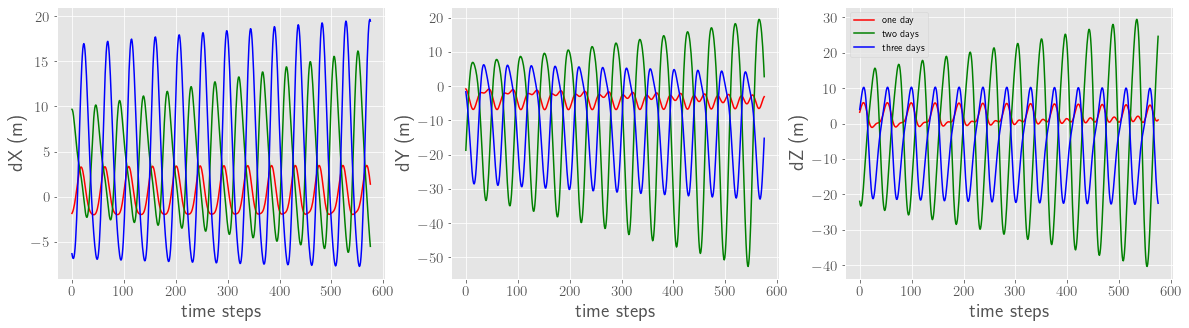

([3.334812972228974],
 [13.574504690943286],
 [18.159889154776465],
 [-1.4865868324413896],
 [14.898638513870537],
 [5.13415771164],
 [5.566656267968938],
 [23.85589944757521],
 [9.88717854488641])

In [176]:
unc.compare_single_prov_ephems(ephemerides, 2021, 7, 26, 1, prov_list, preferred_prov)

In [161]:
# make sure all values are positive
unc_X1day = [x for x in unc_X1day if x>0] 
unc_X2days = [x for x in unc_X2days if x>0]
unc_X3days = [x for x in unc_X3days if x>0]
unc_Y1day = [x for x in unc_Y1day if x>0]
unc_Y2days = [x for x in unc_Y2days if x>0]
unc_Y3days = [x for x in unc_Y3days if x>0]
unc_Z1day = [x for x in unc_Z1day if x>0]
unc_Z2days = [x for x in unc_Z2days if x>0]
unc_Z3days = [x for x in unc_Z3days if x>0]

In [162]:
# finds maximum length of list
maxlen = max(len(unc_X1day),len(unc_X2days),len(unc_X3days),len(unc_Y1day),len(unc_Y2days),len(unc_Y3days),len(unc_Z1day),len(unc_Z2days),len(unc_Z3days))

In [163]:
maxlen

30

In [164]:
# bootstraps lists to make them all the same length
unc_X1day.extend(random.choices(unc_X1day,k=maxlen-len(unc_X1day))) 
unc_X2days.extend(random.choices(unc_X2days,k=maxlen-len(unc_X2days))) 
unc_X3days.extend(random.choices(unc_X3days,k=maxlen-len(unc_X3days))) 
unc_Y1day.extend(random.choices(unc_Y1day,k=maxlen-len(unc_Y1day))) 
unc_Y2days.extend(random.choices(unc_Y2days,k=maxlen-len(unc_Y2days))) 
unc_Y3days.extend(random.choices(unc_Y3days,k=maxlen-len(unc_Y3days))) 
unc_Z1day.extend(random.choices(unc_Z1day,k=maxlen-len(unc_Z1day))) 
unc_Z2days.extend(random.choices(unc_Z2days,k=maxlen-len(unc_Z2days))) 
unc_Z3days.extend(random.choices(unc_Z3days,k=maxlen-len(unc_Z3days)))

In [165]:
dX1d_list = unc_X1day
dX_lin_list = []
dX_exp_list = []
dY1d_list = unc_Y1day
dY_lin_list = []
dY_exp_list = []
dZ1d_list = unc_Z1day
dZ_lin_list = []
dZ_exp_list = []

In [250]:
#dX1d = unc.final_uncertainty(dX1d_list)
#dY1d = unc.final_uncertainty(dY1d_list)
#dZ1d = unc.final_uncertainty(dZ1d_list)
dX1d = np.mean(dX1d_list)
dY1d = np.mean(dY1d_list)
dZ1d = np.mean(dZ1d_list)

In [167]:
print("dX1d:",dX1d)
print("dY1d:",dY1d)
print("dZ1d:",dZ1d)

dX1d: 15.141424687362296
dY1d: 15.59543611694535
dZ1d: 19.102569015245752


In [258]:
for i in range(maxlen):
    dX_lin_list.append(unc.lin_fit([unc_X1day[i],unc_X2days[i],unc_X3days[i]]))
    dY_lin_list.append(unc.lin_fit([unc_Y1day[i],unc_Y2days[i],unc_Y3days[i]]))
    dZ_lin_list.append(unc.lin_fit([unc_Z1day[i],unc_Z2days[i],unc_Z3days[i]]))

    dX_exp_list.append(unc.exp_fit([unc_X1day[i],unc_X2days[i],unc_X3days[i]]))
    dY_exp_list.append(unc.exp_fit([unc_Y1day[i],unc_Y2days[i],unc_Y3days[i]]))
    dZ_exp_list.append(unc.exp_fit([unc_Z1day[i],unc_Z2days[i],unc_Z3days[i]]))   

    #dX_lin = unc.final_uncertainty_gaussian(dX_lin_list)
    #dY_lin = unc.final_uncertainty_gaussian(dY_lin_list)
    #dZ_lin = unc.final_uncertainty_gaussian(dZ_lin_list)                       
    
    #dX_exp = unc.final_uncertainty(dX_exp_list)
    #dY_exp = unc.final_uncertainty(dY_exp_list)
    #dZ_exp = unc.final_uncertainty(dZ_exp_list)   
    
    dX_lin = np.mean(dX_lin_list)
    dY_lin = np.mean(dY_lin_list)
    dZ_lin = np.mean(dZ_lin_list)
    
    dX_exp = np.mean(dX_exp_list)
    dY_exp = np.mean(dY_exp_list)
    dZ_exp = np.mean(dZ_exp_list)

In [236]:
dX_lin_mode = unc.calc_shgo_mode(dX_lin_list)
dY_lin_mode = unc.calc_shgo_mode(dY_lin_list)
dZ_lin_mode = unc.calc_shgo_mode(dY_lin_list)

dX_exp_mode = unc.calc_shgo_mode(dX_exp_list)
dY_exp_mode = unc.calc_shgo_mode(dY_exp_list)
dZ_exp_mode = unc.calc_shgo_mode(dY_exp_list)

In [227]:
print("dX_lin:",dX_lin)
print("dY_lin:",dY_lin)
print("dZ_lin:",dZ_lin)

dX_lin: 19.942234677998044
dY_lin: 28.886880332058695
dZ_lin: 28.95820722524223


In [228]:
print("dX_exp:",dX_exp)
print("dY_exp:",dY_exp)
print("dZ_exp:",dZ_exp)

dX_exp: 42.88667461945758
dY_exp: 24.395372461687217
dZ_exp: 24.729991735232304


In [191]:
dX_mp = 5.51
dY_mp = 7.83
dZ_mp = 6.53

In [171]:
import matplotlib.pyplot as plt

In [174]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

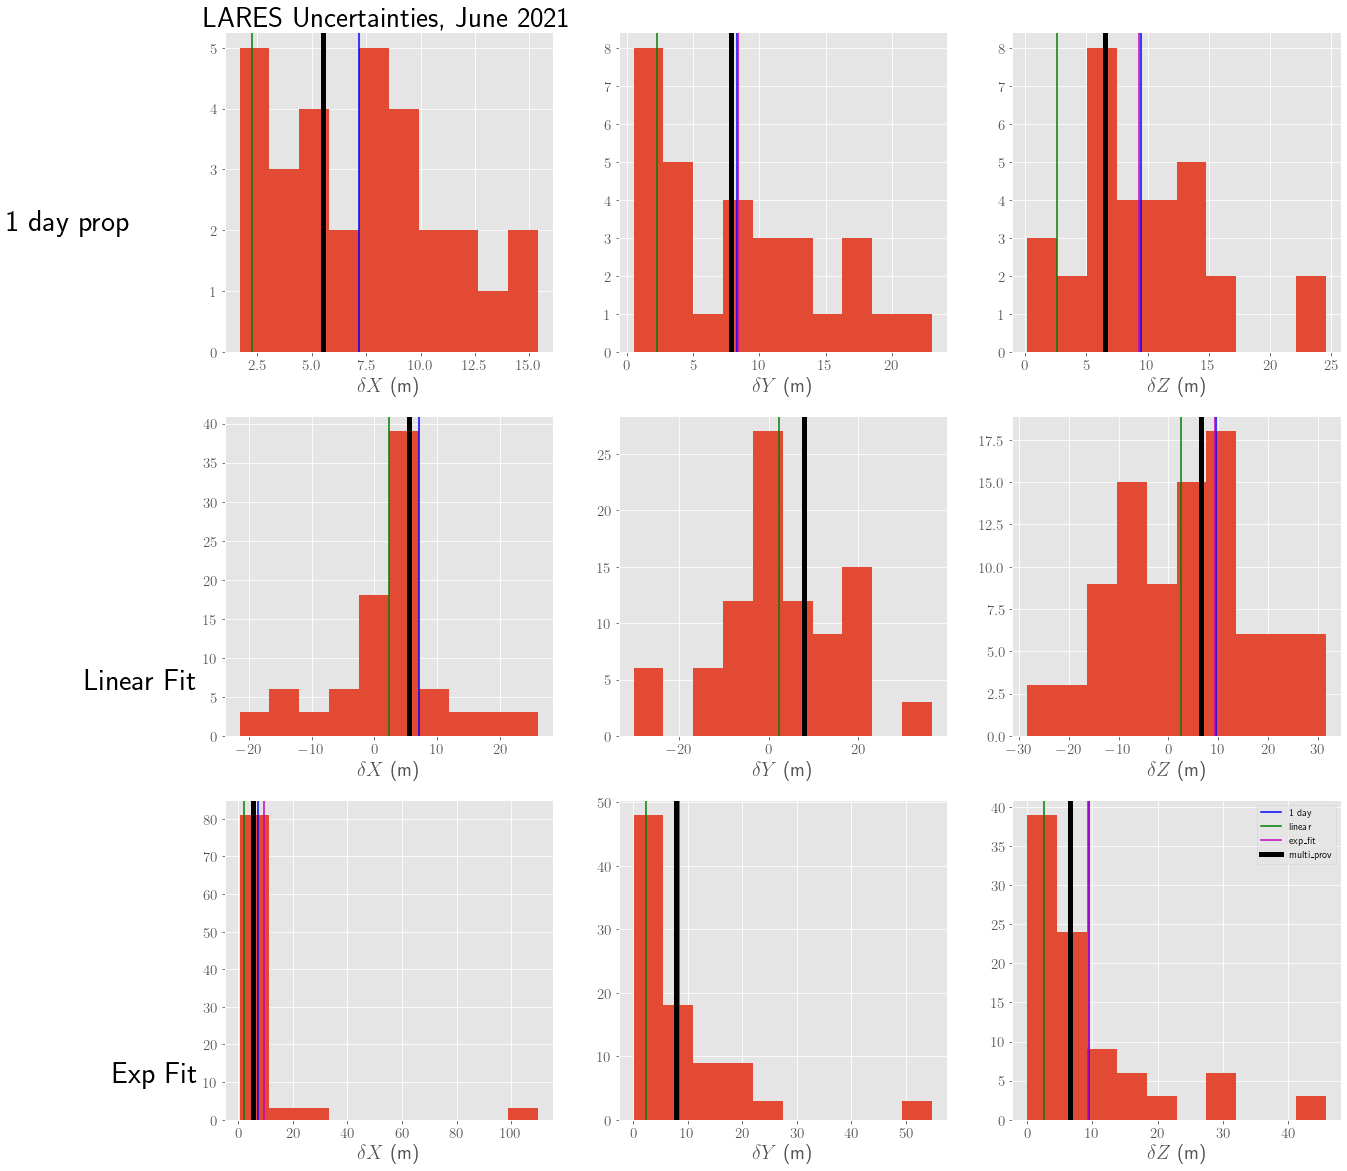

In [259]:
fig,((ax7,ax8,ax9),(ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(3,3,figsize=(20,20))
ax7.set_title('LARES Uncertainties, June 2021')
ax1.hist(dX_lin_list)
ax2.hist(dY_lin_list)
ax3.hist(dZ_lin_list)
ax4.hist(dX_exp_list)
ax5.hist(dY_exp_list)
ax6.hist(dZ_exp_list)
ax7.hist(dX1d_list)
ax8.hist(dY1d_list)
ax9.hist(dZ1d_list)
ax1.axvline(x=dX1d,color="b",label="1 day")
ax4.axvline(x=dX1d,color="b",label="1 day")
ax7.axvline(x=dX1d,color="b",label="1 day")
ax2.axvline(x=dY1d,color="b",label="1 day")
ax5.axvline(x=dY1d,color="b",label="1 day")
ax8.axvline(x=dY1d,color="b",label="1 day")
ax3.axvline(x=dZ1d,color="b",label="1 day")
ax6.axvline(x=dZ1d,color="b",label="1 day")
ax9.axvline(x=dZ1d,color="b",label="1 day")
ax1.axvline(x=dX_lin,color="g",label="linear")
ax4.axvline(x=dX_lin,color="g",label="linear")
ax7.axvline(x=dX_lin,color="g",label="linear")
ax2.axvline(x=dY_lin,color="g",label="linear")
ax5.axvline(x=dY_lin,color="g",label="linear")
ax8.axvline(x=dY_lin,color="g",label="linear")
ax3.axvline(x=dZ_lin,color="g",label="linear")
ax6.axvline(x=dZ_lin,color="g",label="linear")
ax9.axvline(x=dZ_lin,color="g",label="linear")

#ax1.axvline(x=dX_exp,color="m",label="exp_fit")
ax4.axvline(x=dX_exp,color="m",label="exp_fit")
#ax7.axvline(x=dX_exp,color="m",label="exp_fit")
ax2.axvline(x=dY_exp,color="m",label="exp_fit")
ax5.axvline(x=dY_exp,color="m",label="exp_fit")
ax8.axvline(x=dY_exp,color="m",label="exp_fit")
ax3.axvline(x=dZ_exp,color="m",label="exp_fit")
ax6.axvline(x=dZ_exp,color="m",label="exp_fit")
ax9.axvline(x=dZ_exp,color="m",label="exp_fit")

ax1.axvline(x=dX_mp,color="k",label="multi_prov",linewidth=5)
ax4.axvline(x=dX_mp,color="k",label="multi_prov",linewidth=5)
ax7.axvline(x=dX_mp,color="k",label="multi_prov",linewidth=5)
ax2.axvline(x=dY_mp,color="k",label="multi_prov",linewidth=5)
ax5.axvline(x=dY_mp,color="k",label="multi_prov",linewidth=5)
ax8.axvline(x=dY_mp,color="k",label="multi_prov",linewidth=5)
ax3.axvline(x=dZ_mp,color="k",label="multi_prov",linewidth=5)
ax6.axvline(x=dZ_mp,color="k",label="multi_prov",linewidth=5)
ax9.axvline(x=dZ_mp,color="k",label="multi_prov",linewidth=5)


plt.legend()
ax1.set_xlabel(r"$\delta X$ (m)")
ax2.set_xlabel(r"$\delta Y$ (m)")
ax3.set_xlabel(r"$\delta Z$ (m)")
ax4.set_xlabel(r"$\delta X$ (m)")
ax5.set_xlabel(r"$\delta Y$ (m)")
ax6.set_xlabel(r"$\delta Z$ (m)")
ax7.set_xlabel(r"$\delta X$ (m)")
ax8.set_xlabel(r"$\delta Y$ (m)")
ax9.set_xlabel(r"$\delta Z$ (m)")


ax1.text(-46,6,"Linear Fit",fontsize=30)
ax4.text(-46,10,"Exp Fit",fontsize=30)
ax7.text(-9,2,"1 day prop",fontsize=30)
plt.show()

In [232]:
with open("/Users/gkeramidas/Projects/learning/ILRS_single_provider_uncertainties.txt","a") as f:
    f.write("dX:" + "\t" + "1d:" + str(dX1d) + "\t" + "lin_fit:" + str(dX_lin) + "\t" + "exp_fit:" + str(dX_exp) + "\n")
    f.write("dY:" + "\t" + "1d:" + str(dY1d) + "\t" + "lin_fit:" + str(dY_lin) + "\t" + "exp_fit:" + str(dY_exp) + "\n")
    f.write("dZ:" + "\t" + "1d:" + str(dZ1d) + "\t" + "lin_fit:" + str(dZ_lin) + "\t" + "exp_fit:" + str(dZ_exp) + "\n")